# Exercise 09

Implement a guitar effect called "Fuzz". <a href="https://www.youtube.com/watch?v=nrIPxlFzDi0">Here</a> is an example video. Fuzz transforms the input signal by
$$
y = \frac{-x}{|x|} \left(1 - \exp\left(\frac{-g x^2}{|x|}\right) \right)
$$
where $0.1 \leq g \leq 10$ is the gain which controls the level of distortion/fuzz. 

Present the results of your implementation below.

In [1]:
%matplotlib inline
import sys
sys.path.append('../SoundSyn')
sys.path.append('../Thinkdsp')
import soundSyn
import thinkdsp

import numpy as np
import matplotlib.pyplot as plt

In [2]:
waveSin = thinkdsp.sin_wave(220,3)
ssET = soundSyn.SoundSyn()
ssET.set_partial([1,0.8,0.7,0.9,0.5,0.7,0.5,0.5])  # guitar ??
ssET.set_file("sunshine.txt")
waveSun = ssET.make_wave()

In [3]:
def fuzz_conv(inlist, g):
    for i in range(len(inlist)):
        x = inlist[i]
        if (x == 0):
            inlist[i] = 0
        else:
            r = - x / abs(x)
            inlist[i] = - x / abs(x) * (1 - np.exp(-g * x**2 / abs(x)))  
def fuzz(waveIn, gain):
    waveOut = waveIn.copy()
    fuzz_conv(waveOut.ys, gain)
    waveOut.normalize()
    return waveOut

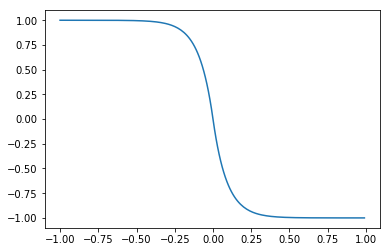

In [4]:
g = 11
x = np.arange(-1,1,0.01)
y = np.arange(-1,1,0.01)
fuzz_conv(y,g)
plt.plot(x,y)

### Sine wave

In [5]:
waveFuzz = fuzz(waveSin, g)
waveFuzz.make_audio()

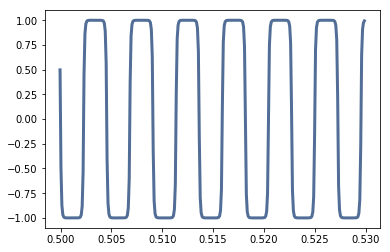

In [6]:
seg = waveFuzz.segment(0.5, 0.03)
seg.plot()

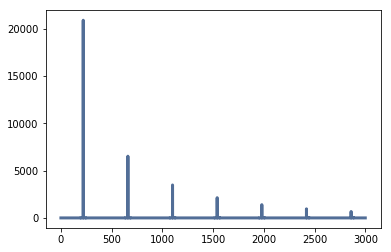

In [7]:
sp = waveFuzz.make_spectrum()
sp.plot(high=3000)

### Synthesis sound

In [8]:
waveSunFuzz = fuzz(waveSun,g)
waveSunFuzz.make_audio()

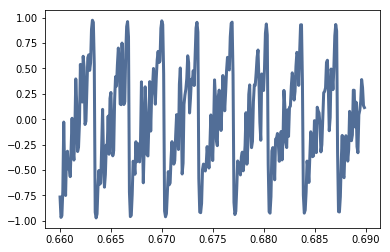

In [9]:
seg = waveSunFuzz.segment(0.66,0.03)
seg.plot()